In [215]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


# Data analysis

In [216]:
%pwd

'/tmp'

In [217]:
%cp /content/drive/MyDrive/Colab/pydomains/data/domain_final.zip /tmp

In [148]:
%cd /tmp

/tmp


In [149]:
!unzip domain_final.zip

Archive:  domain_final.zip
replace domain_final.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: domain_final.csv        


In [6]:
# !gzip -d shallalist.gz

In [150]:
!wc -l domain_final.csv

68456 domain_final.csv


In [151]:
df = pd.read_csv('domain_final.csv')

In [218]:
df.head()

,text,domain_names,cat_name,category_codes
0,chocolate lucky total contact site oatmeal ass...,kizito,shopping,61
1,giving pair desk erect unable times already pr...,rule--34.blogspot,porn,44
2,missional faith state us chapel mission campus...,agapeharvestchurch,religion,53
3,choosing move speed request option become rece...,westernunion.co,finance/other,18
4,number powered purchase contact canada domain ...,phpproxy,redirector,52


In [223]:
df['category_names'] = df['cat_name'].apply(lambda x: str(x).rsplit("/",1)[0])

In [224]:
df['category_names'].unique()

array(['shopping', 'porn', 'religion', 'finance', 'redirector',
       'automobile', 'forum', 'gamble', 'news', 'recreation', 'hobby',
       'models', 'education', 'music', 'chat', 'radiotv', 'spyware',
       'drugs', 'politics', 'science', 'adv', 'webmail', 'downloads',
       'searchengines', 'webradio', 'hospitals', 'government', 'warez',
       'dating', 'dynamic', 'jobsearch', 'alcohol', 'movies', 'military',
       'weapons', 'homestyle', 'library', 'fortunetelling', 'tracker',
       'remotecontrol', 'sex', 'violence', 'ringtones', 'isp',
       'aggressive', 'imagehosting', 'urlshortener', 'hacking',
       'socialnet', 'webphone', 'costtraps', 'podcasts', 'anonvpn',
       'webtv', 'updatesites'], dtype=object)

In [226]:
len(df['category_names'].unique())

55

In [219]:
df['cat_name'].unique()

array(['shopping', 'porn', 'religion', 'finance/other', 'redirector',
       'automobile/cars', 'forum', 'gamble', 'news', 'recreation/sports',
       'recreation/travel', 'hobby/games-online', 'models',
       'education/schools', 'music', 'chat', 'hobby/pets',
       'finance/moneylending', 'finance/insurance', 'finance/banking',
       'radiotv', 'recreation/martialarts', 'spyware', 'drugs',
       'politics', 'hobby/games-misc', 'automobile/bikes',
       'science/chemistry', 'adv', 'webmail', 'downloads',
       'searchengines', 'webradio', 'hospitals', 'government', 'warez',
       'recreation/humor', 'hobby/cooking', 'recreation/restaurants',
       'dating', 'dynamic', 'jobsearch', 'alcohol', 'recreation/wellness',
       'finance/realestate', 'movies', 'military', 'weapons',
       'automobile/planes', 'homestyle', 'library', 'fortunetelling',
       'tracker', 'remotecontrol', 'sex/lingerie', 'violence',
       'ringtones', 'isp', 'aggressive', 'automobile/boats',
       'ima

In [154]:
len(df['cat_name'].unique())

74

In [221]:
df.groupby('cat_name').count()

,text,domain_names,category_codes
cat_name,,,
adv,2268,2268,2268
aggressive,103,103,103
alcohol,358,358,358
anonvpn,52,52,52
automobile/bikes,345,345,345
...,...,...,...
weapons,167,167,167
webmail,548,548,548
webphone,24,24,24


In [225]:
df.groupby('category_names').count()

,text,domain_names,cat_name,category_codes
category_names,,,,
adv,2268,2268,2268,2268
aggressive,103,103,103,103
alcohol,358,358,358,358
anonvpn,52,52,52,52
automobile,1864,1864,1864,1864
chat,3678,3678,3678,3678
costtraps,61,61,61,61
dating,813,813,813,813
downloads,879,879,879,879


In [156]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [157]:
df.groupby('cat_name').count().index

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile/bikes',
       'automobile/boats', 'automobile/cars', 'automobile/planes', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic',
       'education/schools', 'finance/banking', 'finance/insurance',
       'finance/moneylending', 'finance/other', 'finance/realestate',
       'finance/trading', 'fortunetelling', 'forum', 'gamble', 'government',
       'hacking', 'hobby/cooking', 'hobby/games-misc', 'hobby/games-online',
       'hobby/gardening', 'hobby/pets', 'homestyle', 'hospitals',
       'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models',
       'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv',
       'recreation/humor', 'recreation/martialarts', 'recreation/restaurants',
       'recreation/sports', 'recreation/travel', 'recreation/wellness',
       'redirector', 'religion', 'remotecontrol', 'ringtones',
       'science/astronomy', 'science/chemistry', 'searchengines',
 

In [158]:
classes = df.groupby('cat_name').count().index

In [159]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73],
           dtype='int64', name='category_codes')

In [160]:
df.loc[df['category_codes'] == 72]

,text,domain_names,cat_name,category_codes
79,radio available efficiency audio request somet...,wyep.streamguys,webradio,72
140,radio spinning beach information home always l...,wgmuradio,webradio,72
241,milky river feat post ra post new way book fre...,radioclassic,webradio,72
269,team audio beach sharp valley community la hom...,kfiam640,webradio,72
324,smooth radio province weather world format var...,radio-locator,webradio,72
...,...,...,...,...
67345,select twitter ghostly contact looking rolling...,ghostlytalk,webradio,72
67505,radio back brother music air shout always delt...,shoutbrothershout.homestead,webradio,72
67712,radio ser de para news nova roll player kiss c...,webrockradio,webradio,72
68164,radio non radio station official right site we...,foxyradio.narod,webradio,72


In [161]:
df.head()

,text,domain_names,cat_name,category_codes
0,chocolate lucky total contact site oatmeal ass...,kizito,shopping,61
1,giving pair desk erect unable times already pr...,rule--34.blogspot,porn,44
2,missional faith state us chapel mission campus...,agapeharvestchurch,religion,53
3,choosing move speed request option become rece...,westernunion.co,finance/other,18
4,number powered purchase contact canada domain ...,phpproxy,redirector,52


In [162]:
df['domain_names'] + ' ' + df['text'] 

0        kizito chocolate lucky total contact site oatm...
1        rule--34.blogspot giving pair desk erect unabl...
2        agapeharvestchurch missional faith state us ch...
3        westernunion.co choosing move speed request op...
4        phpproxy number powered purchase contact canad...
                               ...                        
68450    studenski die explorer opera browser seine da ...
68451    clarkjoneskarate feature powered data password...
68452    inflagranti-music die wir termine die die auto...
68453    euribor hour fostering reliable available requ...
68454    unsw.edu screening strategy giving become poli...
Length: 68455, dtype: object

In [163]:
len_of_text = df['text'].str.split("\\s+")

In [164]:
len_of_text.str.len().max()

36248

In [165]:
df.loc[df['cat_name'] == 'news']

,text,domain_names,cat_name,category_codes
11,radio test football community recently might c...,wxra945,news,41
37,radio vibration collaboration son music format...,radio.m24,news,41
46,instantly governor imagery leaves shortage fam...,ariannaonline,news,41
48,son de es para position la tu al el un primero...,rpctv,news,41
54,tappa test de magazine number quale tu last co...,giornaledellavela,news,41
...,...,...,...,...
68352,corona die de frank dan van ons nu poll effect...,zwartewaterkrant,news,41
68358,ross radio purpose east family commercially ba...,ecr.co,news,41
68381,radio ser de es dan junto combustible save tu ...,canal7.com,news,41
68440,sa mu ani ale na henry dolina trump sa se roka...,noveslovo,news,41


# Split Data

In [166]:
X = (df['domain_names'] + ' ' + df['text']).values
y = df['category_codes'].values

In [167]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [168]:
X_train.size

47918

In [169]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([1620,   76,  247,   35,  241,   79,  831,  191, 2575,   39,  572,
         633,  870,  263, 2631, 1580,  719,  414,  178,  431,   86,  247,
        1709, 1503,  180,  101,  213,  531, 2095,  277, 1936,   70,  563,
         124,  226, 1065,   57,   50,  409, 1239, 1639, 3869,   26,  497,
        2142, 1125,  230,  546,  416, 2501, 2327,  149,  312, 1440,   12,
          69,  291,   57,  136,   39,  160, 1100,  129,  422,  216,   35,
          94,   24,  150,  125,  386,   21,  278,   49]))

In [170]:
X_rem.size

20537

In [171]:
np.unique(y_rem, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([ 648,   27,  111,   17,  104,   46,  289,   83, 1103,   22,  241,
         246,  405,  106, 1089,  750,  293,  196,   73,  207,   42,  120,
         745,  629,   87,   51,  100,  258,  905,  114,  853,   28,  247,
          61,  103,  437,   26,   20,  165,  536,  679, 1645,   13,  219,
         952,  448,   97,  220,  169, 1094, 1003,   61,  148,  634,    6,
          37,  146,   26,   55,   19,   62,  446,   49,  166,   87,   20,
          45,   10,   54,   42,  162,    3,  125,   12]))

In [172]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [173]:
X_val.size

10268

In [174]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([327,  10,  50,   9,  55,  29, 139,  41, 556,   8, 130, 118, 188,
         50, 550, 384, 141, 112,  41, 107,  20,  49, 385, 327,  39,  22,
         48, 133, 444,  59, 407,  12, 133,  26,  42, 210,  14,   7,  77,
        273, 349, 814,   6, 114, 468, 220,  37, 112,  85, 570, 523,  27,
         74, 314,   3,  15,  68,  14,  28,   7,  30, 235,  21,  88,  41,
          8,  24,   4,  27,  25,  75,   3,  61,   6]))

In [175]:
X_test.size

10269

In [176]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 72, 73], dtype=int8),
 array([321,  17,  61,   8,  49,  17, 150,  42, 547,  14, 111, 128, 217,
         56, 539, 366, 152,  84,  32, 100,  22,  71, 360, 302,  48,  29,
         52, 125, 461,  55, 446,  16, 114,  35,  61, 227,  12,  13,  88,
        263, 330, 831,   7, 105, 484, 228,  60, 108,  84, 524, 480,  34,
         74, 320,   3,  22,  78,  12,  27,  12,  32, 211,  28,  78,  46,
         12,  21,   6,  27,  17,  87,  64,   6]))

In [177]:
X_train[10000]

'seymour.sa.edu centenary privacy request equestrian first gym always culture meeting influence form college giving officer booking print community navigation provider flourish based national phone prospectus conveniently environment make boarding tour future people content uniting emotional benefit strength home overseas safety contact senior education intelligence book give winter campus facsimile find best early personal college complete vision learning doubt fee physics association phone justice spacious code day global compliance technology baccalaureate road unique page skip school vacation formerly junior us one tour read schedule middle learning college allow optimism fee disclaimer confident donation exeat drama plan advisor focus church glen donate teacher support form term worth registration needs risk leadership program care donate international develop shop request day old dance thrive boarding culture south leading engagement sports achievement'

In [178]:
y_train[10000]

14

In [179]:
df[df['domain_names'].str.contains('bmwparklane')]

,text,domain_names,cat_name,category_codes
41464,service finding used promotion running thanks ...,bmwparklane,automobile/cars,6


In [180]:
y_train = to_categorical(y_train, len(df['category_codes'].unique()))
y_val = to_categorical(y_val, len(df['category_codes'].unique()))
y_test = to_categorical(y_test, len(df['category_codes'].unique()))

In [181]:
y_train[10000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

# Creating Dataset

In [182]:
BATCH_SIZE = 64
BUFFER_SIZE = 600000

In [183]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [184]:
text_batch, label_batch = next(iter(train_dataset))
site_name, first_label = text_batch[0], label_batch[0]
print("Name", site_name)
print("Label", first_label)

Name tf.Tensor(b'ashtavinayaktemples beach pilgrimage weekend amidst visit bunder spot pay station lord demon naming covered portal four seen still cave point road floor baga guna enterprise district sides divine complex pali book place done fighting neck pilgrimage success jewel temple said district back bounty various homage condition rejuvenation sage southward jewel marble us eight travel major prevent reside fall giver distance lord wife honeymoon mercy situated put going penance origin shop conference city show beget tour form tour eight contact mosque spiritual assist twitter adventure tour precious photo plaza feeling greedy interest plea state leisure holiday idol tour god comparatively however sun supposed premium got area temple village help nirvana phone one read personally directly idol holy know hill go', shape=(), dtype=string)
Label tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

# Vectorization

In [185]:
max_features = 62000
sequence_length = 5000

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [186]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_dataset.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [187]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [188]:
print("Vectorized data", vectorize_text(site_name, first_label))

Vectorized data (<tf.Tensor: shape=(1, 5000), dtype=int64, numpy=array([[    1,   681, 10218, ...,     0,     0,     0]])>, <tf.Tensor: shape=(74,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>)


In [189]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1000 --->  six
Vocabulary size: 62000


In [190]:
train_ds = train_dataset.map(vectorize_text)
val_ds = val_dataset.map(vectorize_text)
test_ds = test_dataset.map(vectorize_text)

In [191]:
# For performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [192]:
embedding_dim = 256 # tested with 64
weight_decay = 0.00001

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150,
                        activation='relu', 
                        kernel_regularizer=regularizers.L1L2(l1=weight_decay, l2=weight_decay),
                        bias_regularizer=regularizers.L2(weight_decay),
                        activity_regularizer=regularizers.L2(weight_decay)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), activation='softmax')])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 256)         15872256  
                                                                 
 dropout_13 (Dropout)        (None, None, 256)         0         
                                                                 
 global_average_pooling1d_5   (None, 256)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 150)               38550     
                                                                 
 dropout_15 (Dropout)        (None, 150)               0         
                                                      

In [193]:
model_save_filename = "model.h5"

In [194]:
batch_size = 64
epochs = 500
initial_learning_rate = 0.006



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              metrics=['accuracy'])

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)

decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
  return lr * 1/ (1 + decay * epoch)

lrscheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)


In [195]:
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb, lrscheduler_cb])

Epoch 1/500
748/749 [============================>.] - ETA: 0s - loss: 3.5907 - accuracy: 0.1017
Epoch 1: val_accuracy improved from -inf to 0.17199, saving model to model.h5
749/749 [==============================] - 15s 19ms/step - loss: 3.5905 - accuracy: 0.1018 - val_loss: 3.2768 - val_accuracy: 0.1720 - lr: 0.0060
Epoch 2/500
748/749 [============================>.] - ETA: 0s - loss: 3.0962 - accuracy: 0.2208
Epoch 2: val_accuracy improved from 0.17199 to 0.28282, saving model to model.h5
749/749 [==============================] - 14s 19ms/step - loss: 3.0959 - accuracy: 0.2209 - val_loss: 2.8661 - val_accuracy: 0.2828 - lr: 0.0060
Epoch 3/500
748/749 [============================>.] - ETA: 0s - loss: 2.7285 - accuracy: 0.3312
Epoch 3: val_accuracy improved from 0.28282 to 0.39005, saving model to model.h5
749/749 [==============================] - 14s 19ms/step - loss: 2.7282 - accuracy: 0.3314 - val_loss: 2.5595 - val_accuracy: 0.3900 - lr: 0.0060
Epoch 4/500
748/749 [==========

In [196]:
model = tf.keras.models.load_model(model_save_filename)

# Evaluate

In [197]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

161/161 [==============================] - 1s 4ms/step - loss: 2.3760 - accuracy: 0.4521
Loss:  2.3759586811065674
Accuracy:  0.4521375000476837


# Confusion Matrix

In [299]:
test_txt = []
test_labels = []

for txt, label in test_ds:
  for t in txt:
    test_txt.append(t.numpy())
  for l in label:
    test_labels.append(l.numpy())

In [300]:
len(test_txt)

10269

In [301]:
len(test_labels)

10269

In [302]:
len(test_txt[0])

5000

In [303]:
len(test_labels[0])

74

In [304]:
test_txt = np.array(test_txt)
test_labels = np.array(test_labels)

In [305]:
predicted = model.predict(test_txt)

In [306]:
len(predicted)

10269

In [316]:
y_pred = np.argmax(predicted, axis=1)
y_true = np.argmax(test_labels, axis=1)

In [321]:
test_acc = sum(y_pred == y_true) / len(y_true)

In [322]:
test_acc

0.4521375012172558

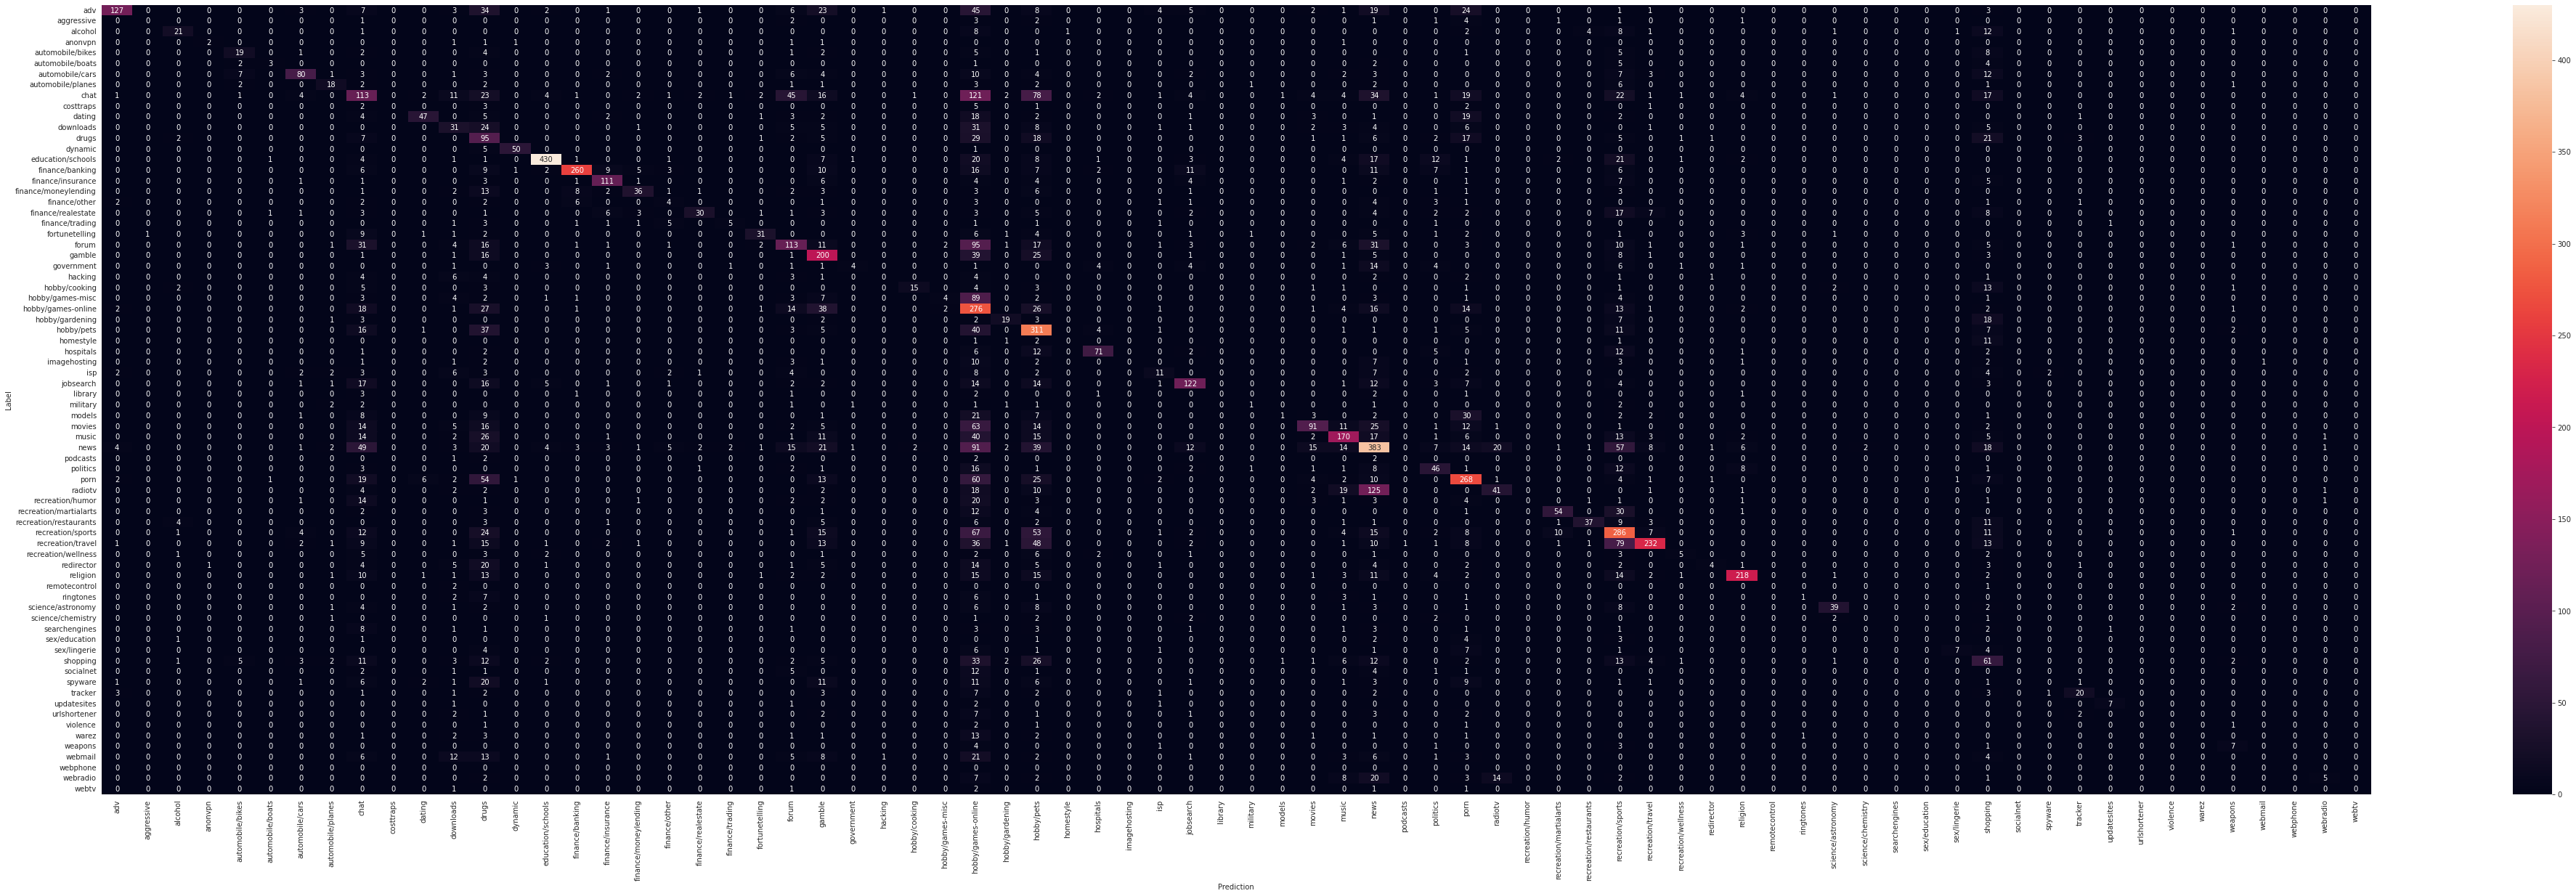

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(70, 20))
sns.set_style(style='white')

sns.heatmap(confusion_mtx,
            xticklabels=classes,
            yticklabels=classes,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Plot

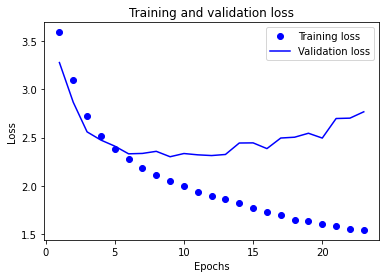

In [198]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

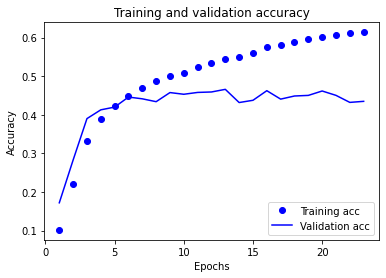

In [199]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save Model

In [200]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(test_dataset)
print(accuracy)

161/161 [==============================] - 1s 6ms/step - loss: 2.3760 - accuracy: 0.4521
0.4521375000476837


# Inference

In [201]:
examples = [
    "yahoo.com",
    "forbes.com",
    "draftkings.com/",
    "pornhub.com",
    "xvideos.com",
    "google.com",
    "amazon.com",
    "facebook.com",
    "fidelity.com",
    "youtube.com",
    "youporn.com",
    "bellesa.co"
]


import requests
from bs4 import BeautifulSoup
from bs4.element import Comment
from nltk.corpus import stopwords
import nltk
import re
import string 

nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)
      result = u" ".join(t.strip().lower() for t in visible_texts if t.strip().isalpha())
      return ' '.join(result.split())

def data_cleanup(s):
      # remove numbers
      s = re.sub(r'\d+', '', s)
      # remove duplicates
      tokens = list(set(s.split()))
      # remove punctuation from each token
      table = str.maketrans('', '', string.punctuation)
      tokens = [w.translate(table) for w in tokens]
      # remove non english words
      tokens = [w.lower() for w in tokens if w.lower() in words]
      # remove non alpha
      tokens = [w.lower() for w in tokens if w.isalpha()]
      # remove non ascii
      tokens = [w.lower() for w in tokens if w.isascii()]
      # filter out stop words
      tokens = [w for w in tokens if not w in stop_words]
      # filter out short tokens
      tokens = [word for word in tokens if len(word) > 1]
      return " ".join(w for w in tokens)

for i in range(len(examples)):
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  text = data_cleanup(text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [202]:
examples

['yahoo news tomorrow shopping celebrity sports health help life feedback yesterday sat quartz weather scoreboard politics finance search science style mail entertainment today sun people video business home technology advertise twitter cancer libra sagittarius',
 'forbes innovation privacy latest retail transportation video popular retirement featured media travel purple business advertise ai chewy dell energy science dining cloud style leadership advisor money explore store gear subscribe breaking education policy',
 'draftkings ',
 'pornhub free dick march orientation yesterday next cancel amateur mobile random popular black public upgrade pussy verify login community white ebony exclusive discover ass angel advertise threesome bondage sex feedback hot home roommate access gay festival impregnate sinner resend explore content dutch cartoon premium anal press masturbation information mature',
 'xvideos account oiled advertising interracial teen rough next amateur black cheating caugh

In [203]:
results = export_model.predict(examples)

In [204]:
results

array([[1.84228066e-02, 5.08160237e-03, 4.02702345e-03, 3.74013092e-03,
        8.28646217e-03, 2.35495530e-03, 1.99946873e-02, 1.56261753e-02,
        7.04005361e-02, 3.22891399e-03, 7.36394478e-03, 4.05364409e-02,
        3.02180871e-02, 1.08035631e-03, 3.30013619e-03, 2.94468761e-03,
        4.88541508e-03, 7.08651217e-03, 3.94855021e-03, 3.44960904e-03,
        3.00439936e-03, 1.44933658e-02, 5.74737638e-02, 2.09464226e-02,
        2.64418707e-03, 1.80512052e-02, 9.38048307e-03, 2.04529427e-02,
        4.92025986e-02, 8.64899997e-03, 2.16910224e-02, 6.17347797e-03,
        7.35612586e-04, 1.64265577e-02, 2.05190200e-02, 1.37037896e-02,
        6.78639440e-03, 5.58514427e-03, 1.48130236e-02, 2.33438108e-02,
        2.12899223e-02, 5.43403141e-02, 3.56493331e-03, 8.96876864e-03,
        2.22394448e-02, 5.32425148e-03, 1.93052497e-02, 3.23365955e-03,
        2.59399973e-03, 1.95479635e-02, 1.26116909e-02, 5.03067393e-03,
        2.14916170e-02, 1.18504837e-02, 2.74770893e-03, 6.779458

In [205]:
probs = tf.nn.softmax(results)

In [206]:
probs

<tf.Tensor: shape=(12, 74), dtype=float32, numpy=
array([[0.01357868, 0.01339873, 0.01338461, 0.01338077, 0.01344174,
        0.01336225, 0.01360005, 0.01354076, 0.01430314, 0.01337393,
        0.01342935, 0.0138823 , 0.0137398 , 0.01334523, 0.01337488,
        0.01337013, 0.0133961 , 0.01342562, 0.01338356, 0.01337688,
        0.01337093, 0.01352543, 0.01411943, 0.013613  , 0.01336611,
        0.01357364, 0.01345646, 0.01360628, 0.01400313, 0.01344662,
        0.01362313, 0.01341337, 0.01334063, 0.0135516 , 0.01360718,
        0.01351476, 0.01342159, 0.01340548, 0.01352976, 0.01364567,
        0.01361767, 0.01407526, 0.01337843, 0.01345092, 0.01363061,
        0.01340198, 0.01359067, 0.01337399, 0.01336544, 0.01359397,
        0.01350001, 0.01339805, 0.01362042, 0.01348973, 0.0133675 ,
        0.0134215 , 0.01356148, 0.01338873, 0.01350307, 0.01338248,
        0.01339686, 0.01393225, 0.01342454, 0.01366063, 0.01336852,
        0.01335993, 0.01347023, 0.01338862, 0.01344476, 0.0134923 

In [207]:
res_args = tf.argmax(results, 1)

In [208]:
res_args

<tf.Tensor: shape=(12,), dtype=int64, numpy=array([ 8, 41, 28, 44, 44, 28, 28, 28, 28, 28, 44, 44])>

In [209]:
res_args.numpy()

array([ 8, 41, 28, 44, 44, 28, 28, 28, 28, 28, 44, 44])

In [210]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile/bikes',
       'automobile/boats', 'automobile/cars', 'automobile/planes', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic',
       'education/schools', 'finance/banking', 'finance/insurance',
       'finance/moneylending', 'finance/other', 'finance/realestate',
       'finance/trading', 'fortunetelling', 'forum', 'gamble', 'government',
       'hacking', 'hobby/cooking', 'hobby/games-misc', 'hobby/games-online',
       'hobby/gardening', 'hobby/pets', 'homestyle', 'hospitals',
       'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models',
       'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv',
       'recreation/humor', 'recreation/martialarts', 'recreation/restaurants',
       'recreation/sports', 'recreation/travel', 'recreation/wellness',
       'redirector', 'religion', 'remotecontrol', 'ringtones',
       'science/astronomy', 'science/chemistry', 'searchengines',
 

In [211]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args[i]]}")

yahoo : chat
forbes : news
draftkings : hobby/games-online
pornhub : porn
xvideos : porn
google : hobby/games-online
amazon : hobby/games-online
facebook : hobby/games-online
fidelity : hobby/games-online
youtube : hobby/games-online
youporn : porn
bellesa : porn


In [212]:
!ls -ltr

total 276908
lrwxrwxrwx 1 root root        61 Apr 28 18:14 dap_multiplexer.INFO -> dap_multiplexer.5ab087af95ce.root.log.INFO.20220428-181415.60
srwxr-xr-x 1 root root         0 Apr 28 18:14 debugger_4cmr1emcv
-rw-r--r-- 1 root root      1517 Apr 28 18:14 dap_multiplexer.5ab087af95ce.root.log.INFO.20220428-181415.60
srw------- 1 root root         0 Apr 28 18:16 drivefs_ipc.0
srw------- 1 root root         0 Apr 28 18:16 drivefs_ipc.0_shell
lrwxrwxrwx 1 root root        73 Apr 28 18:16 directoryprefetcher_binary.INFO -> directoryprefetcher_binary.5ab087af95ce.root.log.INFO.20220428-181606.287
drwx------ 2 root root      4096 Apr 28 18:16 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root      1567 Apr 28 18:16 directoryprefetcher_binary.5ab087af95ce.root.log.INFO.20220428-181606.287
drwx------ 2 root root      4096 Apr 28 18:16 pyright-296-Pag2WLssE0qO
drwx------ 2 root root      4096 Apr 28 18:16 pyright-296-4TlDLLQsfly2
-rw------- 1 root root       211 Apr 28 18:17 __autograph_generated_f

In [213]:
!zip model.h5.zip model.h5

  adding: model.h5 (deflated 11%)


In [214]:
%cp /tmp/model.h5.zip /content/drive/MyDrive/Colab/pydomains/data/